# Web Traffic Time Series Forecasting
# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
train_1 = pd.read_csv('./train_1.csv/train_1.csv')
train_2 = pd.read_csv('./train_2.csv/train_2.csv')

In [3]:
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [5]:
train_2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [6]:
train_1.shape

(145063, 551)

In [7]:
len(train_1.columns)

551

In [8]:
train_1.Page.nunique()

145063

In [9]:
train_1.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

# Melting the date into weekend

In [10]:
train_flattened = pd.melt(train_1[list(train_1.columns[-100:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [11]:
train_flattened.shape

(14506300, 4)

# Finding the missing value counts and its percentage

In [12]:
missing = pd.concat([train_flattened.isnull().sum(),100 * train_flattened.isnull().mean()],axis = 1)
missing.columns = ['count','%']
missing.sort_values(by=['count','%'],ascending = False).head(83)

,count,%
Visits,448140,3.089278
Page,0,0.000000
date,0,0.000000
weekend,0,0.000000


# Caluculating mean and median for page visits

In [13]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [14]:
train_flattened.head()

,date,Visits,weekend,mean,median
Page,,,,,
!vote_en.wikipedia.org_all-access_all-agents,2016-09-23,3.0,0.0,3.494949,3.0
!vote_en.wikipedia.org_all-access_all-agents,2016-09-24,1.0,1.0,3.494949,3.0
!vote_en.wikipedia.org_all-access_all-agents,2016-09-25,2.0,1.0,3.494949,3.0
!vote_en.wikipedia.org_all-access_all-agents,2016-09-26,7.0,0.0,3.494949,3.0
!vote_en.wikipedia.org_all-access_all-agents,2016-09-27,5.0,0.0,3.494949,3.0


In [15]:
train_flattened.reset_index(drop=False,inplace=True)

In [16]:
train_flattened.isnull().sum()

Page            0
date            0
Visits     448140
weekend         0
mean       106800
median     106800
dtype: int64

In [17]:
train_flattened.shape

(14506300, 6)

# splitting weekday date into day,month & year using lambda function

In [18]:
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())

In [19]:
# Feature engineering with the date
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

In [20]:
train_flattened.month.value_counts()

12    4496953
10    4496953
11    4351890
9     1160504
Name: month, dtype: int64

# plotting page visits on date (Time series - Average)

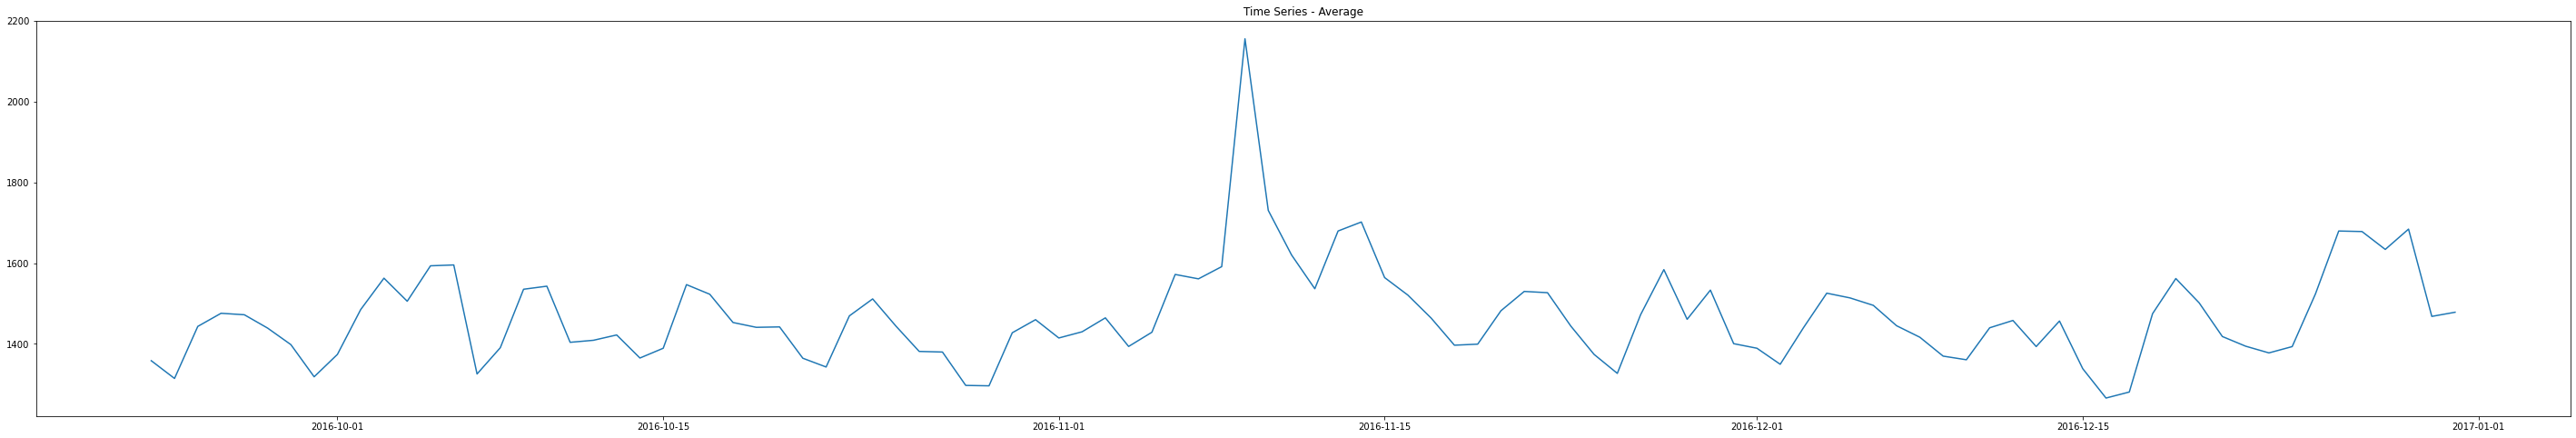

In [21]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

In [22]:
mean_group.head()

date
2016-09-23    1358.139593
2016-09-24    1314.132128
2016-09-25    1443.174317
2016-09-26    1475.678637
2016-09-27    1472.014139
Name: Visits, dtype: float64

# plotting page visits on date (Time series - Median)

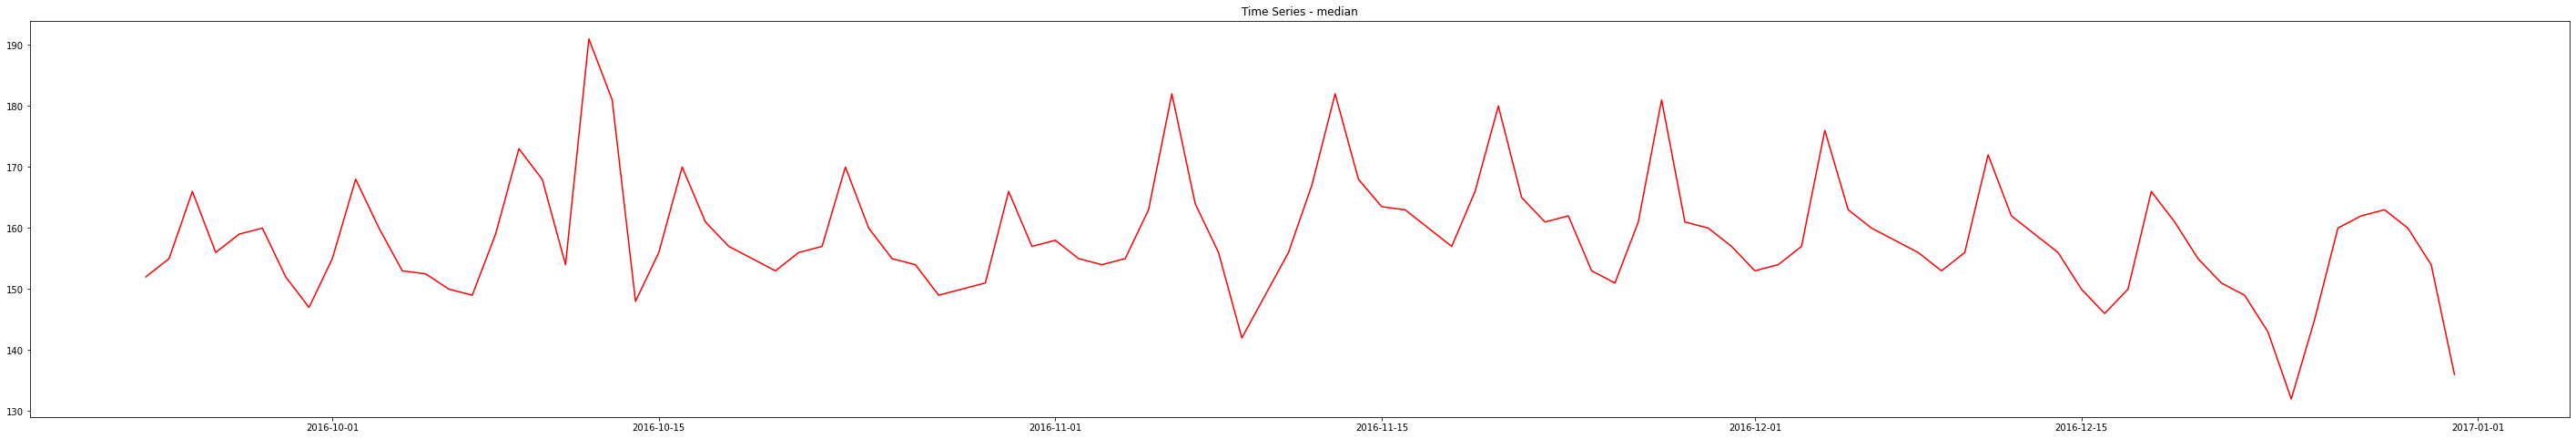

In [23]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

# plotting page visits on date (Time series - standard deviation)

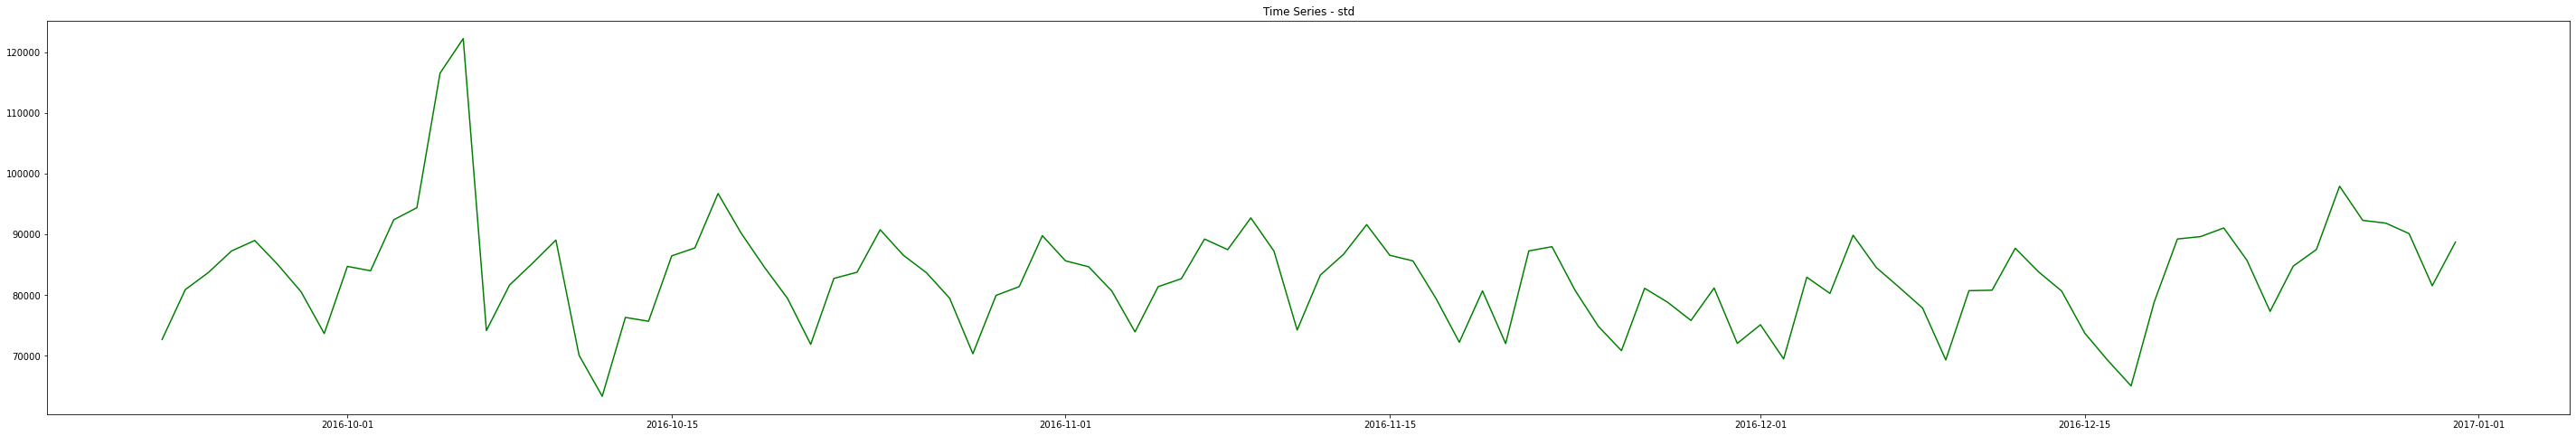

In [24]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

# Replacing weekday with weekday names

In [25]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [26]:
train_flattened.head()

,Page,date,Visits,weekend,mean,median,weekday,year,month,day,month_num,weekday_num
0,!vote_en.wikipedia.org_all-access_all-agents,2016-09-23,3.0,0.0,3.494949,3.0,05 - Friday,2016,9,23,9,4
1,!vote_en.wikipedia.org_all-access_all-agents,2016-09-24,1.0,1.0,3.494949,3.0,06 - Saturday,2016,9,24,9,5
2,!vote_en.wikipedia.org_all-access_all-agents,2016-09-25,2.0,1.0,3.494949,3.0,07 - Sunday,2016,9,25,9,6
3,!vote_en.wikipedia.org_all-access_all-agents,2016-09-26,7.0,0.0,3.494949,3.0,01 - Monday,2016,9,26,9,0
4,!vote_en.wikipedia.org_all-access_all-agents,2016-09-27,5.0,0.0,3.494949,3.0,02 - Tuesday,2016,9,27,9,1


In [27]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

In [28]:
train_group.head()

month,9,10,11,12
weekday,,,,
01 - Monday,1475.678637,1519.851531,1563.303811,1553.219910
02 - Tuesday,1472.014139,1451.457052,1525.993416,1517.166439
03 - Wednesday,1438.976725,1455.955992,1589.787190,1488.305696
04 - Thursday,1398.002120,1459.596700,1508.029762,1444.474767
05 - Friday,1338.205496,1337.795093,1434.203884,1365.955630


# plotting Heatmap for web Traffic Months across weekdays

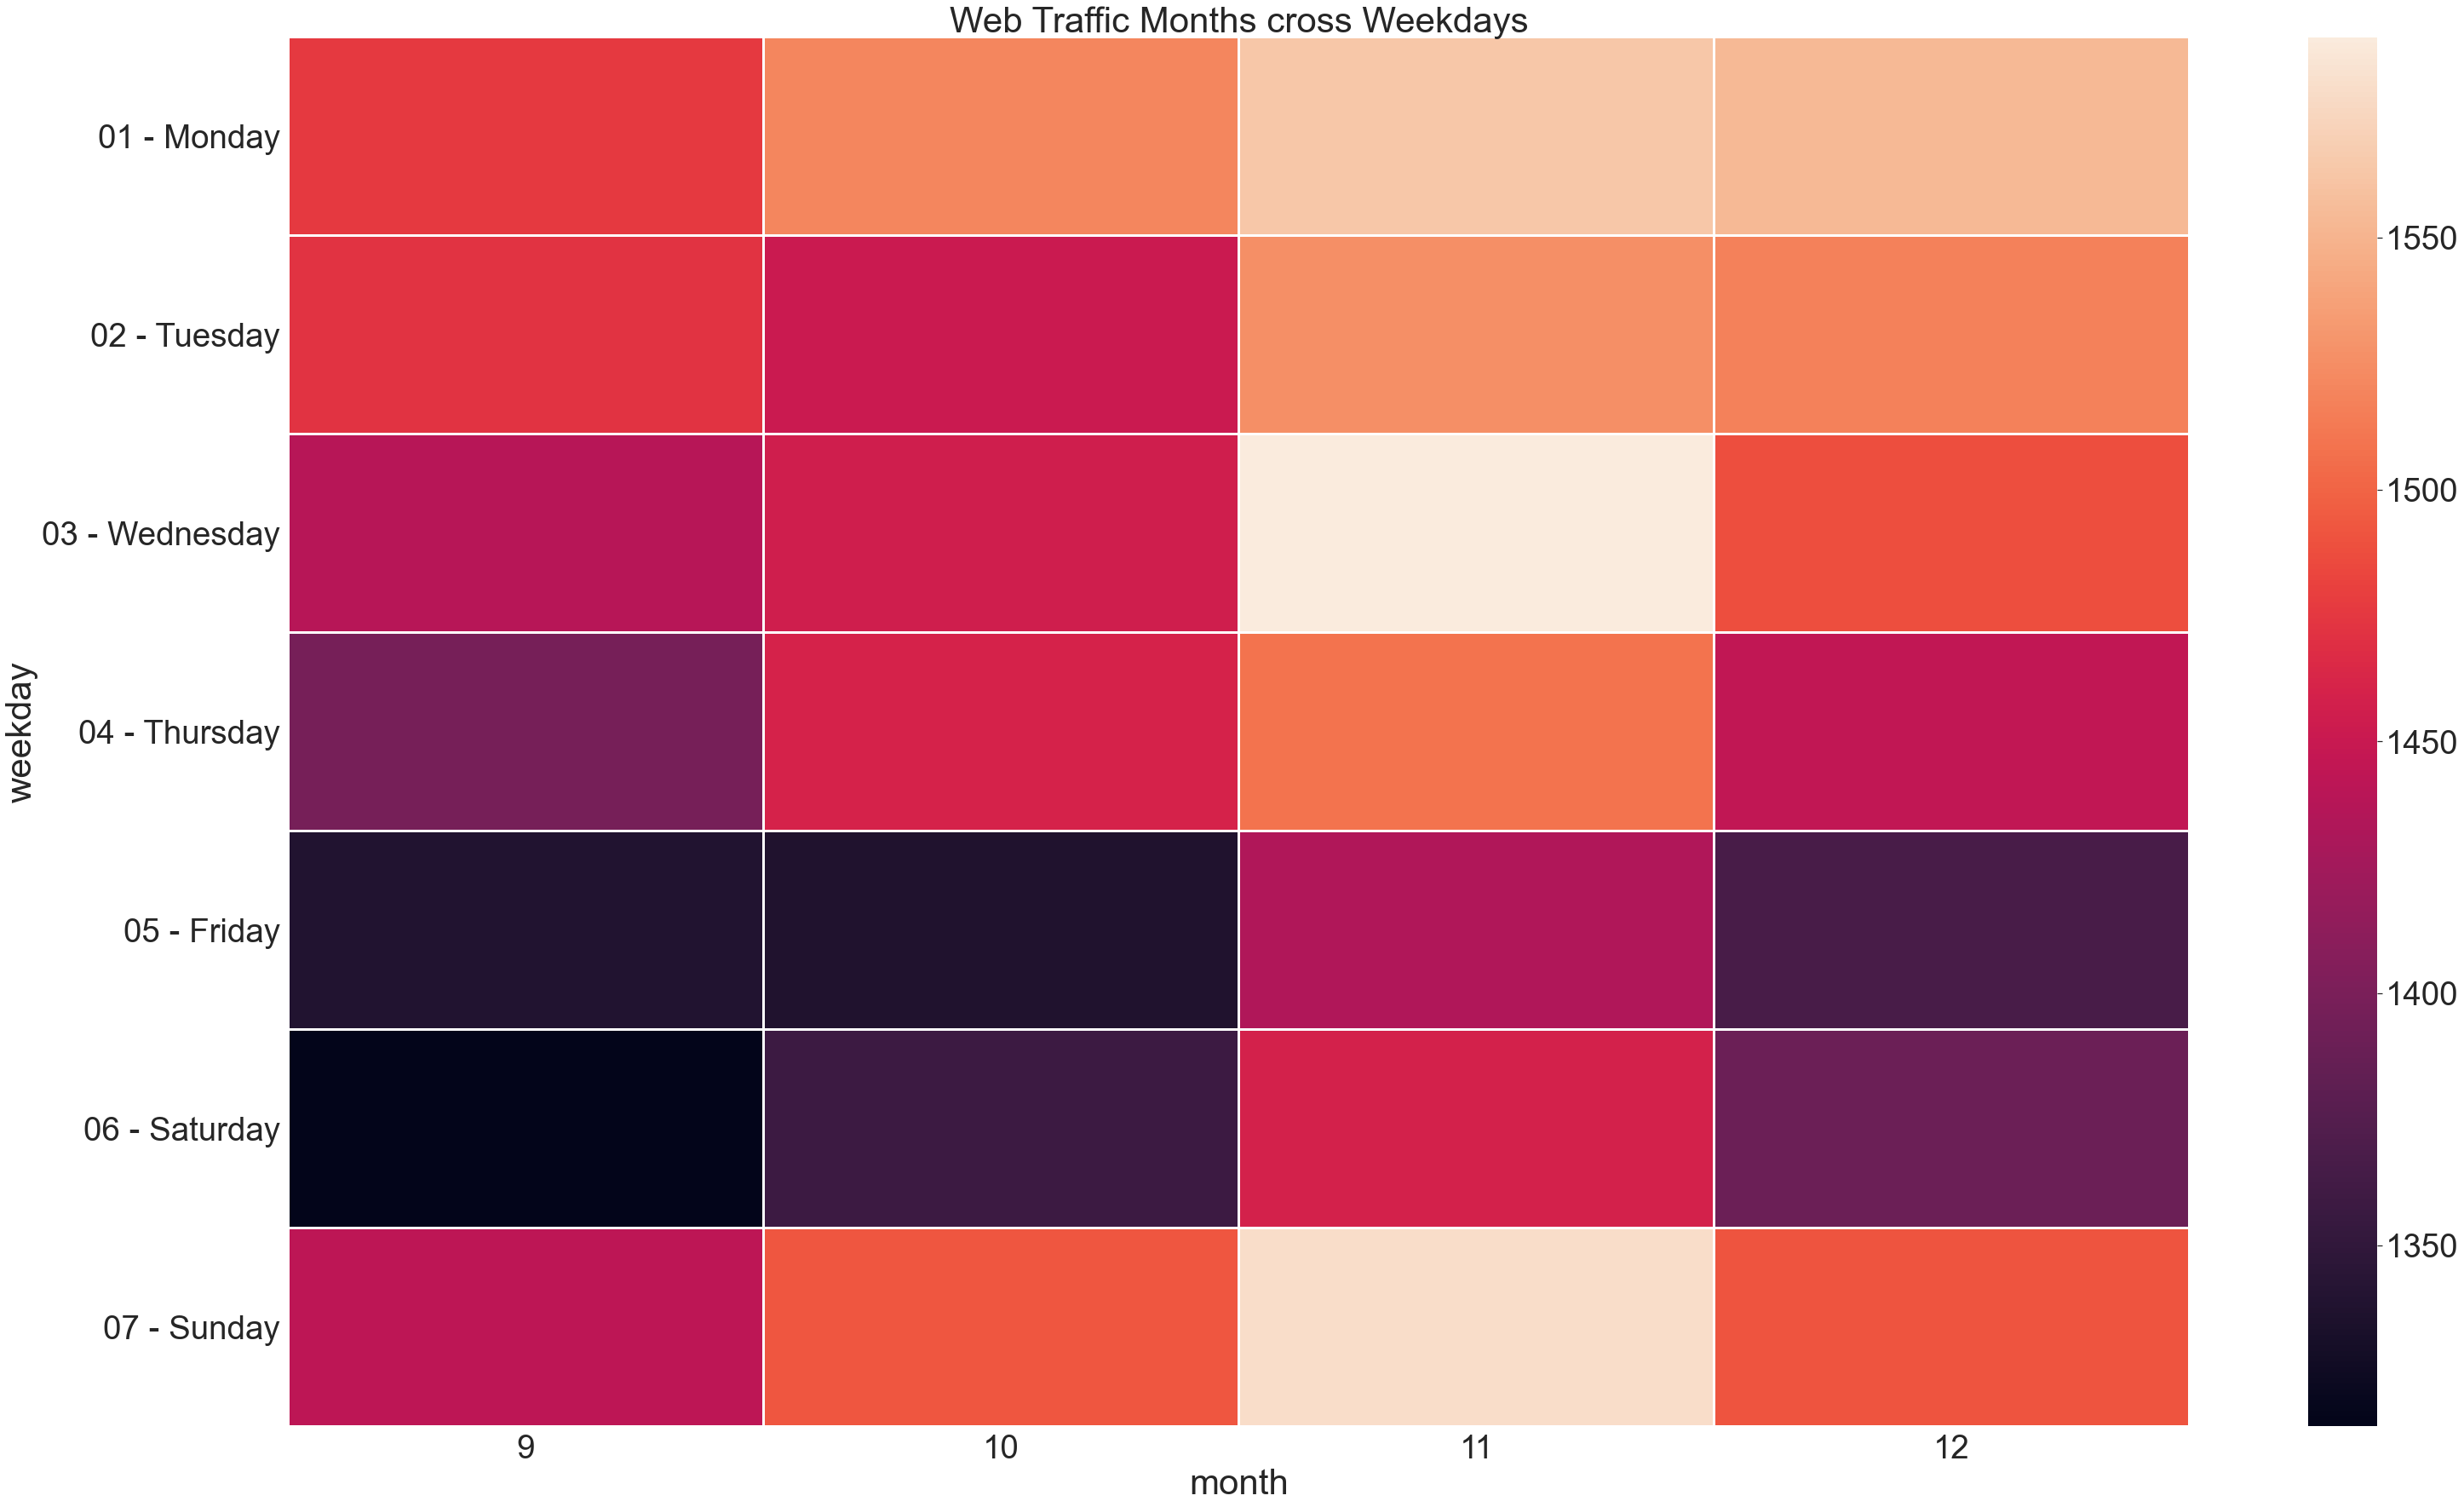

In [29]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

# Observation:
- Compare to other weekdays, in the month of november(11th) sunday and wednesday have more web traffic.

In [30]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

In [31]:
train_day.head()

month,9,10,11,12
day,,,,
23,1358.139593,1469.254107,1444.043898,1377.481718
24,1314.132128,1511.288679,1373.814638,1393.099208
25,1443.174317,1443.930784,1326.709107,1523.739922
26,1475.678637,1381.143449,1472.107224,1679.606554
27,1472.014139,1379.630739,1583.903133,1678.301870


# plotting Heatmap for web Traffic Months across days

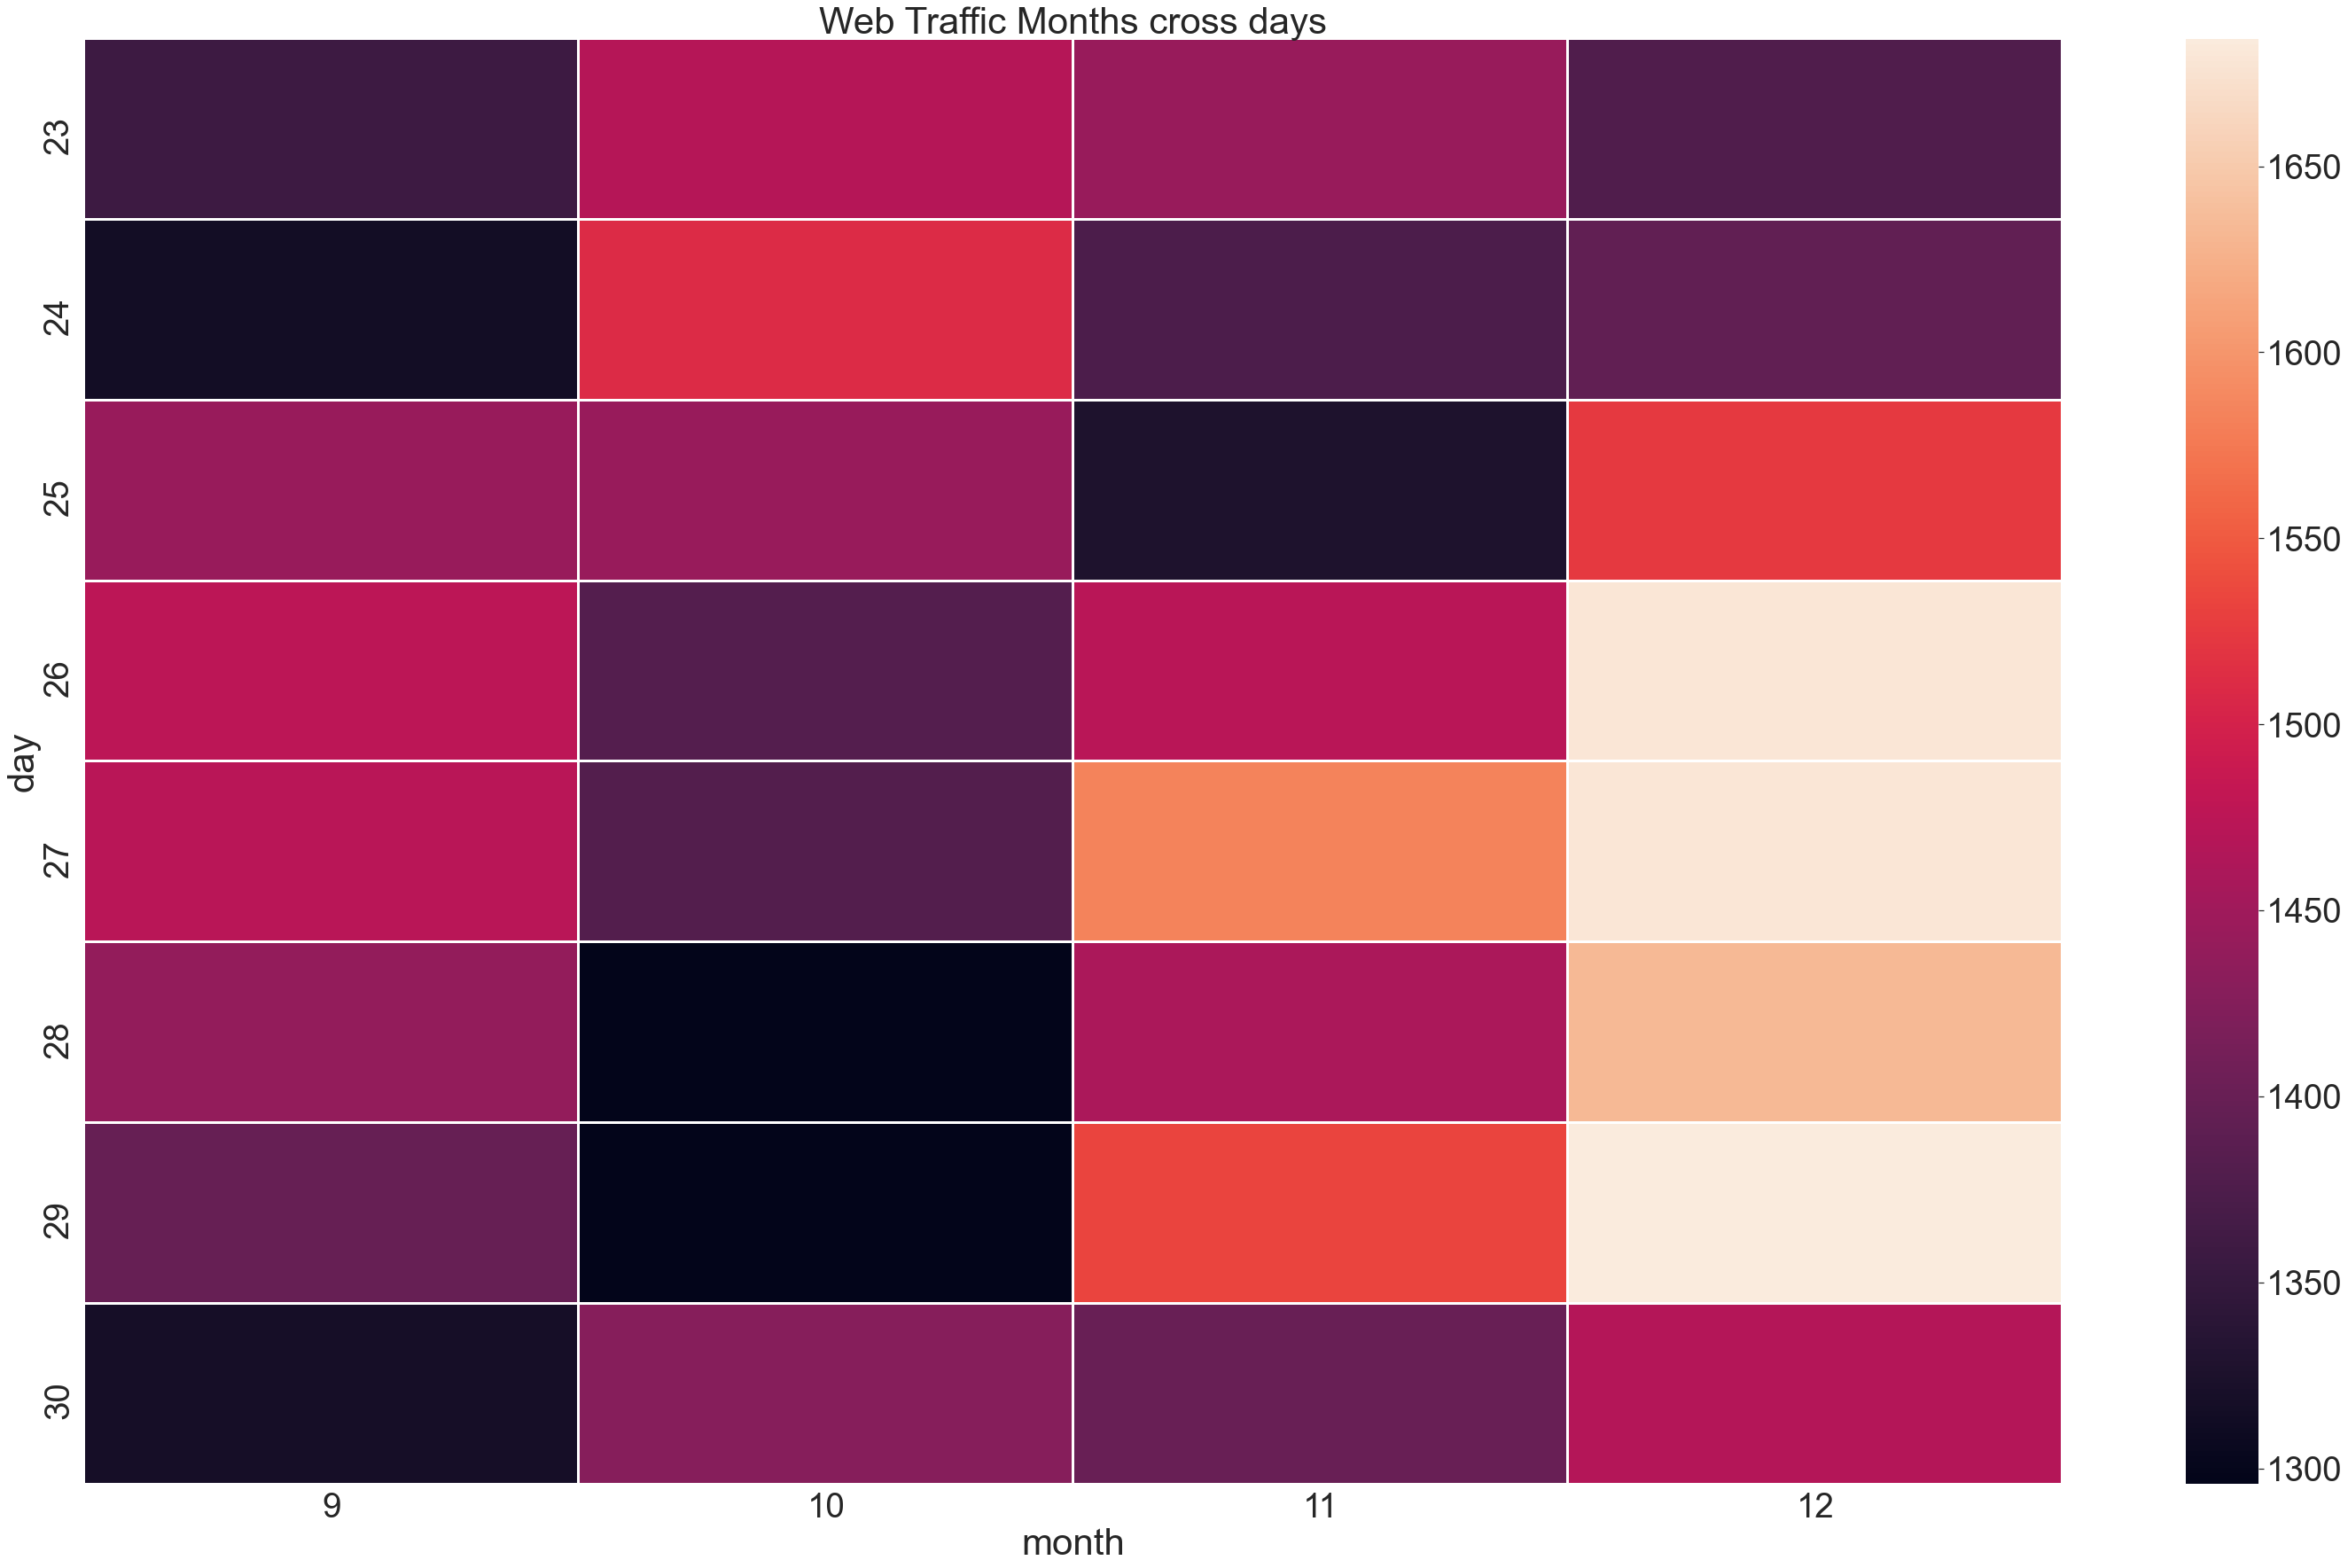

In [32]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()

# Observation:
- From the above HeatMap, we see a lot of web Traffic on days 26,27 and 29 in the December month(12th).

# Resetting index for the dataframe

In [33]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['date'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['date'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
times_series_means.head()

,date,Visits,weekday,year,month,day
0,2016-09-23,1358.139593,4,2016,09,23
1,2016-09-24,1314.132128,5,2016,09,24
2,2016-09-25,1443.174317,6,2016,09,25
3,2016-09-26,1475.678637,0,2016,09,26
4,2016-09-27,1472.014139,1,2016,09,27


# Finding weekend or not

In [34]:
times_series_means['is_weekend'] = times_series_means.weekday.isin([5,6])*1

In [35]:
times_series_means.head()

,date,Visits,weekday,year,month,day,is_weekend
0,2016-09-23,1358.139593,4,2016,09,23,0
1,2016-09-24,1314.132128,5,2016,09,24,1
2,2016-09-25,1443.174317,6,2016,09,25,1
3,2016-09-26,1475.678637,0,2016,09,26,0
4,2016-09-27,1472.014139,1,2016,09,27,0


# Feature Extraction
## After several Modification made on the training dataset we came to a conclusion that these features will be useful for our upcomming predicitions

In [36]:
times_series_means.set_index('date',inplace=True)
times_series_means.head()

,Visits,weekday,year,month,day,is_weekend
date,,,,,,
2016-09-23,1358.139593,4,2016,09,23,0
2016-09-24,1314.132128,5,2016,09,24,1
2016-09-25,1443.174317,6,2016,09,25,1
2016-09-26,1475.678637,0,2016,09,26,0
2016-09-27,1472.014139,1,2016,09,27,0


In [37]:
times_series_means.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-09-23 to 2016-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Visits      100 non-null    float64
 1   weekday     100 non-null    int64  
 2   year        100 non-null    object 
 3   month       100 non-null    object 
 4   day         100 non-null    object 
 5   is_weekend  100 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 5.1+ KB


# converting object type to numeric(int64)

In [38]:
times_series_means[['year','month','day']] = times_series_means[['year','month','day']].apply(pd.to_numeric)

In [39]:
times_series_means.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-09-23 to 2016-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Visits      100 non-null    float64
 1   weekday     100 non-null    int64  
 2   year        100 non-null    int64  
 3   month       100 non-null    int64  
 4   day         100 non-null    int64  
 5   is_weekend  100 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 5.1 KB


# plotting website visit count monthly

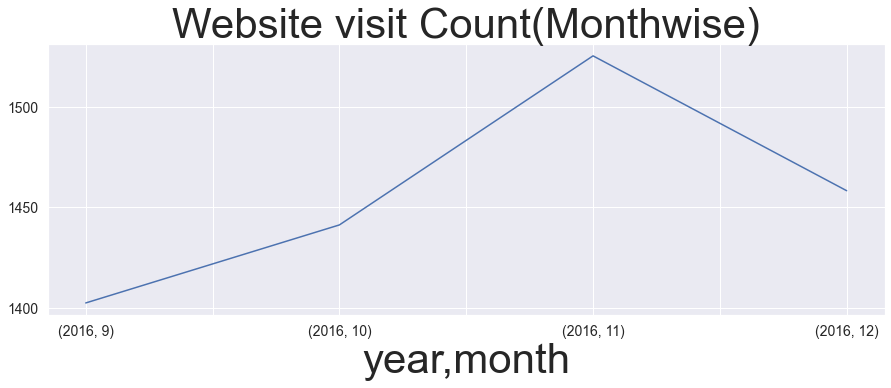

In [40]:
temp=times_series_means.groupby(['year', 'month'])['Visits'].mean()
temp.plot(figsize=(15,5), title= 'Website visit Count(Monthwise)', fontsize=14);

# plotting monthly visits

<AxesSubplot:xlabel='month'>

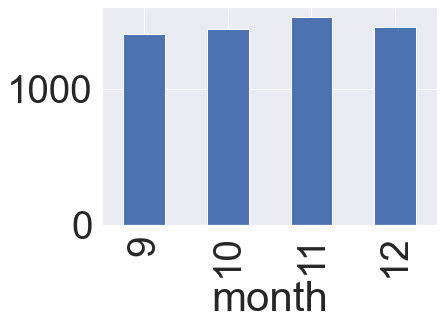

In [41]:
times_series_means.groupby('month')['Visits'].mean().plot.bar()

# plotting weekday visits

<AxesSubplot:xlabel='weekday'>

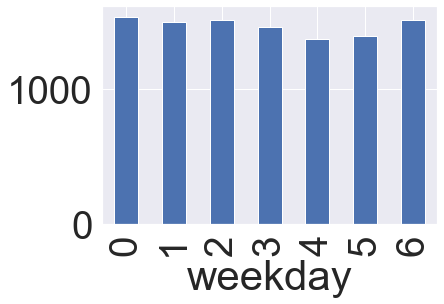

In [42]:
times_series_means.groupby('weekday')['Visits'].mean().plot.bar()

# Resampling daily,weekly & yearly with respect to 'D','W' & 'M'

In [43]:
# Converting to daily mean
daily = times_series_means.resample('D').mean()
# Converting to weekly mean
weekly = times_series_means.resample('W').mean()
# Converting to monthly mean
monthly = times_series_means.resample('M').mean()

# subplots for daily,weekly & monthly visits

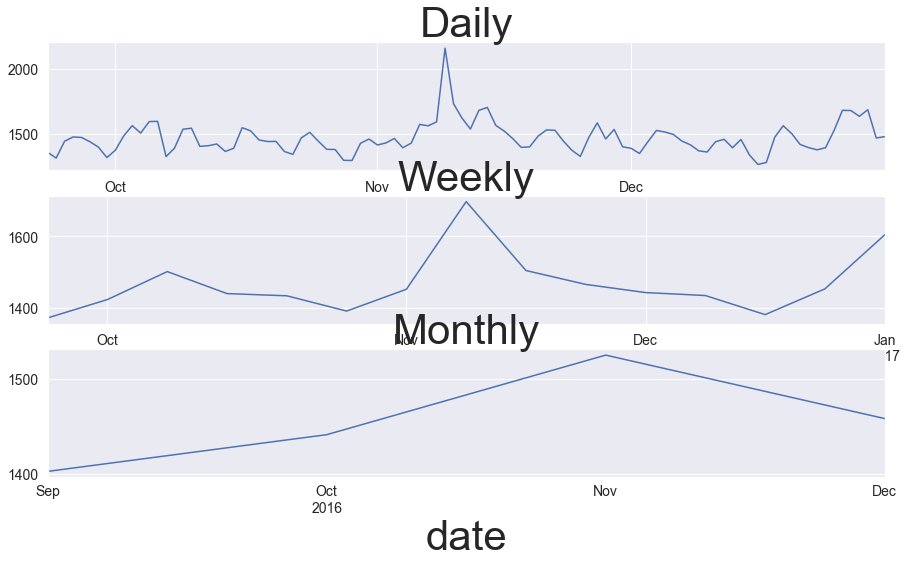

In [44]:
fig, axs = plt.subplots(3,1)
daily.Visits.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[0])
weekly.Visits.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[1])
monthly.Visits.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[2]);

 # Consideration :
 - We consider Daily Time series from our data as it is similar to time series pattern and is easy to analyze trends.

In [45]:
data_daily=pd.DataFrame(times_series_means.resample('D').mean()['Visits']).round(0)
data_daily.head()

,Visits
date,
2016-09-23,1358.0
2016-09-24,1314.0
2016-09-25,1443.0
2016-09-26,1476.0
2016-09-27,1472.0


In [46]:
print(data_daily.index.min())
print(data_daily.index.max())

2016-09-23 00:00:00
2016-12-31 00:00:00


In [47]:
import datetime as dt
ref_dt1 = dt.datetime(2016,12,1)
print(ref_dt1)

2016-12-01 00:00:00


In [48]:
train=data_daily.loc[:ref_dt1]

In [49]:
ref_dt2 = dt.datetime(2016,12,2)
print(ref_dt2)

2016-12-02 00:00:00


In [50]:
valid=data_daily.loc[ref_dt2:]
valid

,Visits
date,
2016-12-02,1349.0
2016-12-03,1440.0
2016-12-04,1526.0
2016-12-05,1514.0
2016-12-06,1495.0
2016-12-07,1445.0
2016-12-08,1416.0
2016-12-09,1370.0
2016-12-10,1360.0


In [51]:
times_series_means.head()

,Visits,weekday,year,month,day,is_weekend
date,,,,,,
2016-09-23,1358.139593,4,2016,9,23,0
2016-09-24,1314.132128,5,2016,9,24,1
2016-09-25,1443.174317,6,2016,9,25,1
2016-09-26,1475.678637,0,2016,9,26,0
2016-09-27,1472.014139,1,2016,9,27,0


# Dickey Fuller test for stationary check on time series mean

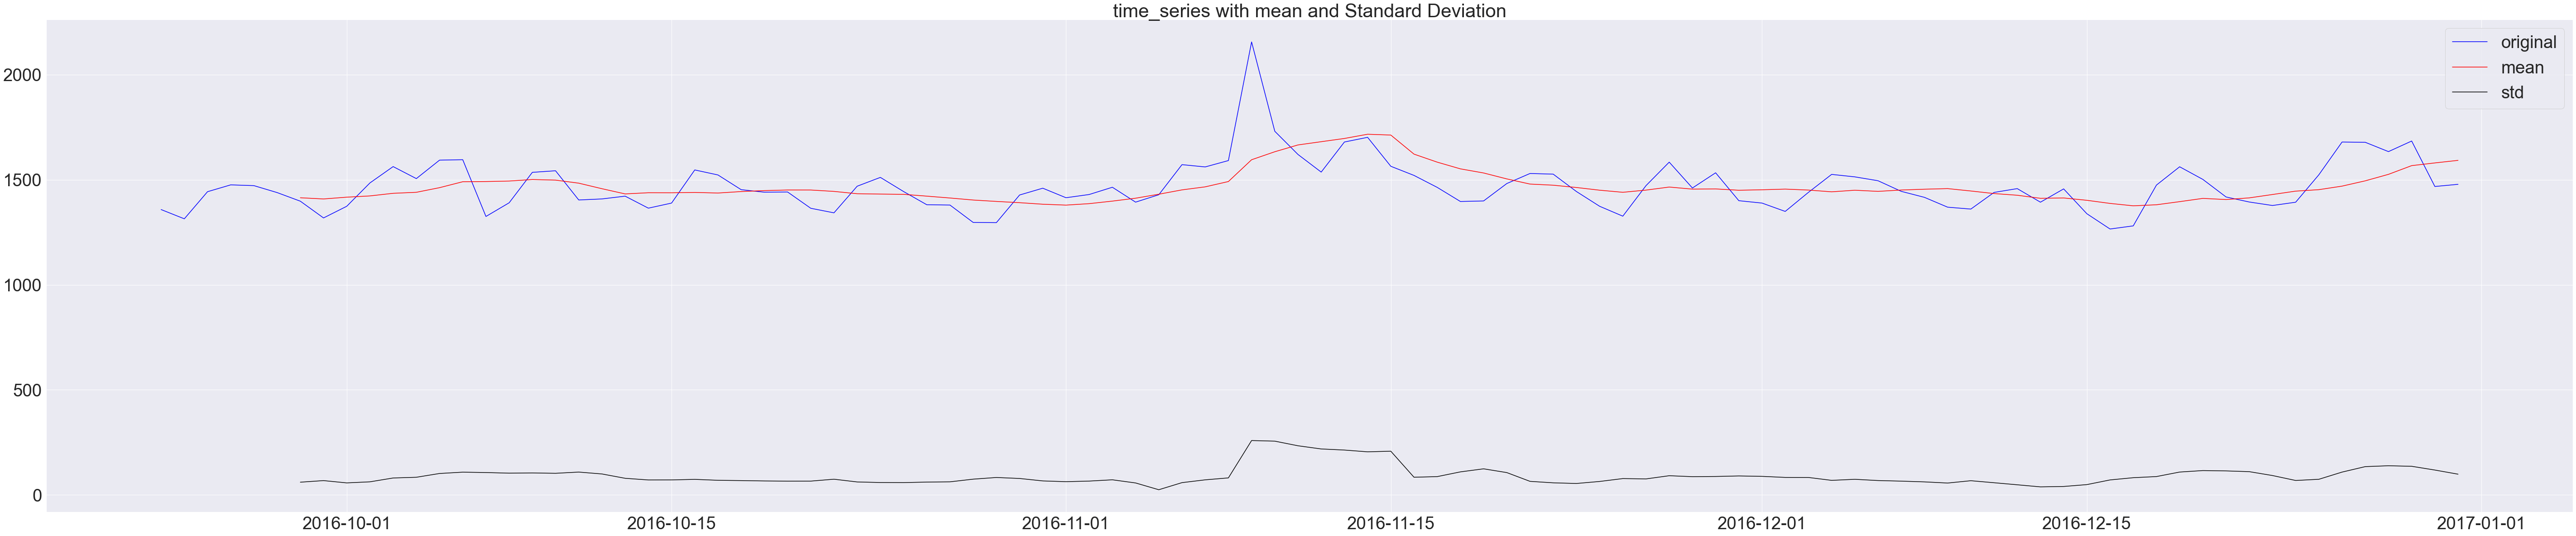

Results of Dickey Fuller Test
Test Statistic                 -5.043755
p-value                         0.000018
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [52]:
df_date = times_series_means[['Visits']]
def stationarity_check(timeseries):
    roll_mean = timeseries.rolling(7).mean()
    roll_std = timeseries.rolling(7).std()
    #plot rolling statistics
    plt.figure(figsize = (100,20))
    orig = plt.plot(timeseries,color = 'blue',label = 'original')
    mean = plt.plot(roll_mean,color = 'red',label = 'mean')
    std = plt.plot(roll_std,color = 'black', label = 'std')
    plt.legend(loc='best')
    plt.title('time_series with mean and Standard Deviation')
    plt.show(block = False)
    
    #DickeyFuller Test
    print('Results of Dickey Fuller Test')
    dftest = sm.tsa.adfuller(timeseries['Visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
stationarity_check(df_date)

# Conclusion:
- The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

# Dickey Fuller Test for stationary check on train data

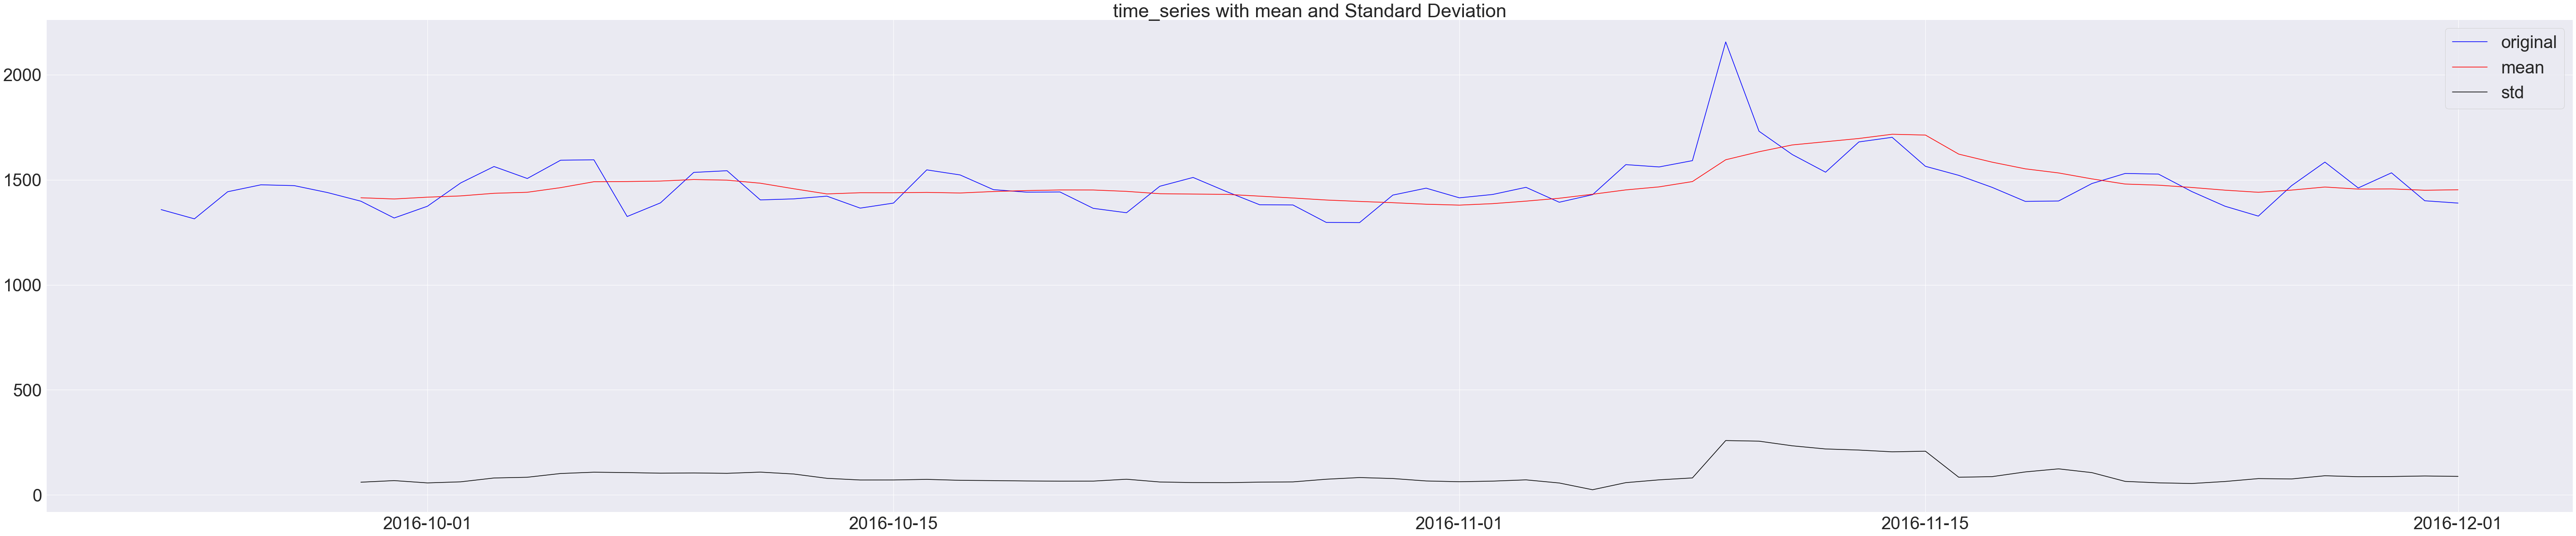

Results of Dickey Fuller Test
Test Statistic                 -4.403754
p-value                         0.000292
#Lags Used                      0.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [54]:
df_date = train[['Visits']]
def stationarity_check(timeseries):
    roll_mean = timeseries.rolling(7).mean()
    roll_std = timeseries.rolling(7).std()
    #plot rolling statistics
    plt.figure(figsize = (100,20))
    orig = plt.plot(timeseries,color = 'blue',label = 'original')
    mean = plt.plot(roll_mean,color = 'red',label = 'mean')
    std = plt.plot(roll_std,color = 'black', label = 'std')
    plt.legend(loc='best')
    plt.title('time_series with mean and Standard Deviation')
    plt.show(block = False)
    
    #DickeyFuller Test
    print('Results of Dickey Fuller Test')
    dftest = sm.tsa.adfuller(timeseries['Visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
stationarity_check(df_date)

# Plot the original data, the trend, the seasonality, and the residuals 

<Figure size 36000x1440 with 0 Axes>

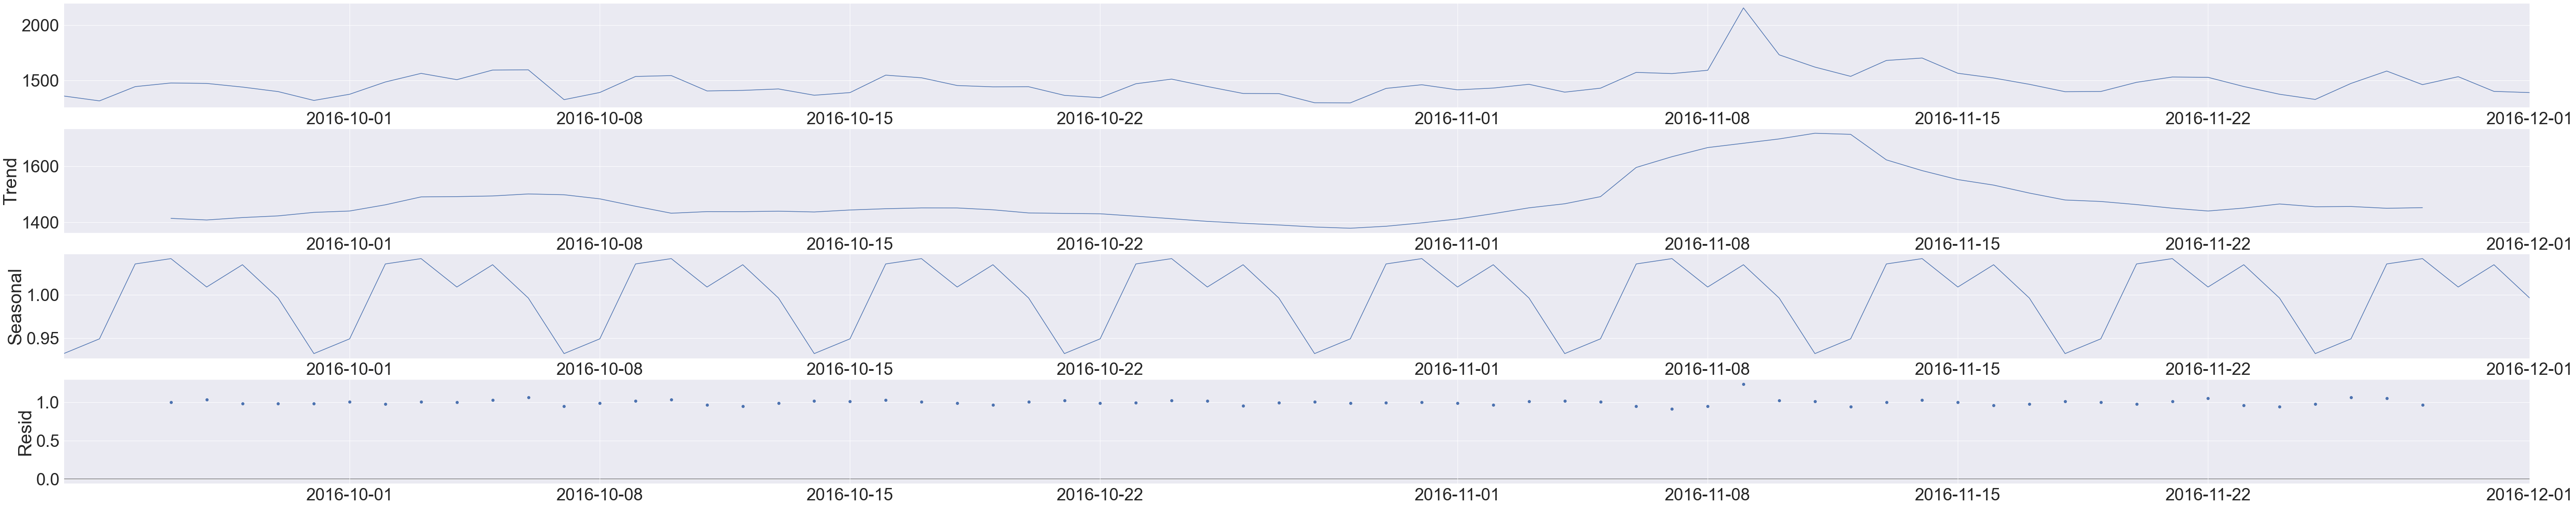

In [55]:

fig = plt.figure(figsize = (500,20))
# Plot the original data, the trend, the seasonality, and the residuals 
sd = sm.tsa.seasonal_decompose(df_date,model='multiplicative')
fig=sd.plot()
fig.set_size_inches(100, 20)

# KPSS test for stationary check 

In [56]:
from statsmodels.tsa.stattools import kpss
res = kpss(df_date)
summary = pd.Series(res[0:4], index=['kpss_stat','p-value','#Lags Used','crit'])
summary

kpss_stat                                                    0.175757
p-value                                                           0.1
#Lags Used                                                         11
crit          {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
dtype: object

In [57]:
from statsmodels.tsa.stattools import kpss
res = kpss(train[['Visits']])
summary = pd.Series(res[0:4], index=['kpss_stat','p-value','#Lags Used','crit'])
summary

kpss_stat                                                    0.175757
p-value                                                           0.1
#Lags Used                                                         11
crit          {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
dtype: object

# plotting ACF

<Figure size 1440x576 with 0 Axes>

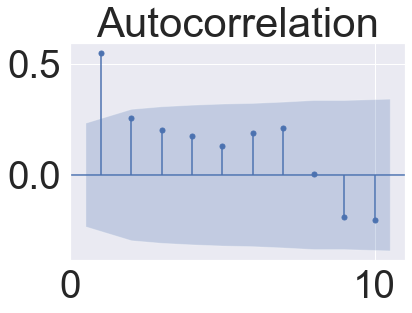

In [58]:
plt.figure(figsize=(20,8))
plot_acf(train['Visits'],lags = 10,zero=False)
plt.show();

# plotting PACF

<Figure size 1440x576 with 0 Axes>

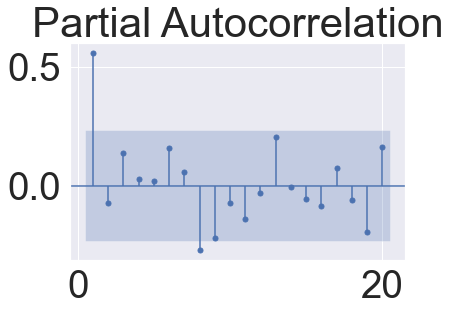

In [59]:
plt.figure(figsize=(20,8))
plot_pacf(train['Visits'],lags = 20,zero = False)
plt.show();

# calculating AIC & BIC for ARIMA Model

In [60]:
ARorder_aic_bic=[]
for p in range(5):
    for q in range(5):
        try:
            arma_model = ARIMA(train,order = (p,0,q))
            results = arma_model.fit()
            ARorder_aic_bic.append((p,q,results.aic,results.bic))
            print(p,q,results.aic,results.bic)
            
        except:
            print(p,q,None,None)

0 0 878.8321328331215 883.3291233172203
0 1 858.4036106238796 865.1490963500277
0 2 857.8385037683258 866.8324847365233
0 3 859.4843910712293 870.7268672814761
0 4 860.4230374133185 873.9140088656147
1 0 855.3499394015967 862.0954251277448
1 1 856.9362640448564 865.9302450130539
1 2 858.0512770725866 869.2937532828333
1 3 860.0409151011509 873.5318865534471
1 4 861.6539268671042 877.3933935614498
2 0 857.0941875380906 866.0881685062881
2 1 858.7369546981961 869.9794309084429
2 2 860.0445539052789 873.5355253575751
2 3 861.9507290561814 877.690195750527
2 4 860.6784920305456 878.6664539669405
3 0 858.0972388624468 869.3397150726936
3 1 859.9161733346325 873.4071447869287
3 2 None None
3 3 857.6414933042306 875.6294552406255
3 4 None None
4 0 860.0283238599941 873.5192953122903
4 1 861.977834974811 877.7173016691565
4 2 863.9160574768418 881.9040194132367
4 3 None None
4 4 None None


# sorting AIC,BIC in increasing order

In [61]:
# Construct DataFrame from order_aic_bic

ARorder_df = pd.DataFrame(ARorder_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print('----------------------sorting by AIC--------------')
print(ARorder_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print('----------------------sorting by BIC--------------')

print(ARorder_df.sort_values('BIC'))

----------------------sorting by AIC--------------
    p  q         AIC         BIC
5   1  0  855.349939  862.095425
6   1  1  856.936264  865.930245
10  2  0  857.094188  866.088169
17  3  3  857.641493  875.629455
2   0  2  857.838504  866.832485
7   1  2  858.051277  869.293753
15  3  0  858.097239  869.339715
1   0  1  858.403611  865.149096
11  2  1  858.736955  869.979431
3   0  3  859.484391  870.726867
16  3  1  859.916173  873.407145
18  4  0  860.028324  873.519295
8   1  3  860.040915  873.531887
12  2  2  860.044554  873.535525
4   0  4  860.423037  873.914009
14  2  4  860.678492  878.666454
9   1  4  861.653927  877.393394
13  2  3  861.950729  877.690196
19  4  1  861.977835  877.717302
20  4  2  863.916057  881.904019
0   0  0  878.832133  883.329123
----------------------sorting by BIC--------------
    p  q         AIC         BIC
5   1  0  855.349939  862.095425
1   0  1  858.403611  865.149096
6   1  1  856.936264  865.930245
10  2  0  857.094188  866.088169
2   0  

# conclusion :
- For p=1, q=0 we got less AIC and BIC values.

# predicting ARIMA and calculating Mean Absolute Error(MAE)

In [2]:
# Fit model
model = ARIMA(train, order=(1,0,0))
arma_results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

NameError: name 'ARIMA' is not defined

In [63]:
arma_results.fittedvalues

date
2016-09-23    1467.889708
2016-09-24    1407.196021
2016-09-25    1384.112490
2016-09-26    1458.543553
2016-09-27    1458.007812
2016-09-28    1464.608069
2016-09-29    1447.331462
2016-09-30    1429.061213
2016-10-01    1384.338018
2016-10-02    1422.546034
2016-10-03    1471.879131
2016-10-04    1510.207214
2016-10-05    1477.597309
2016-10-06    1543.565435
2016-10-07    1530.203315
2016-10-08    1384.510870
2016-10-09    1452.834295
2016-10-10    1503.057781
2016-10-11    1499.860046
2016-10-12    1427.593507
2016-10-13    1447.486031
2016-10-14    1441.529671
2016-10-15    1408.729703
2016-10-16    1428.077448
2016-10-17    1511.136930
2016-10-18    1481.502457
2016-10-19    1459.056999
2016-10-20    1456.928045
2016-10-21    1454.800457
2016-10-22    1408.225274
2016-10-23    1404.329258
2016-10-24    1471.417859
2016-10-25    1479.302896
2016-10-26    1447.244966
2016-10-27    1421.287722
2016-10-28    1422.837760
2016-10-29    1369.166913
2016-10-30    1377.567112
2016-10

# plotting ARMA

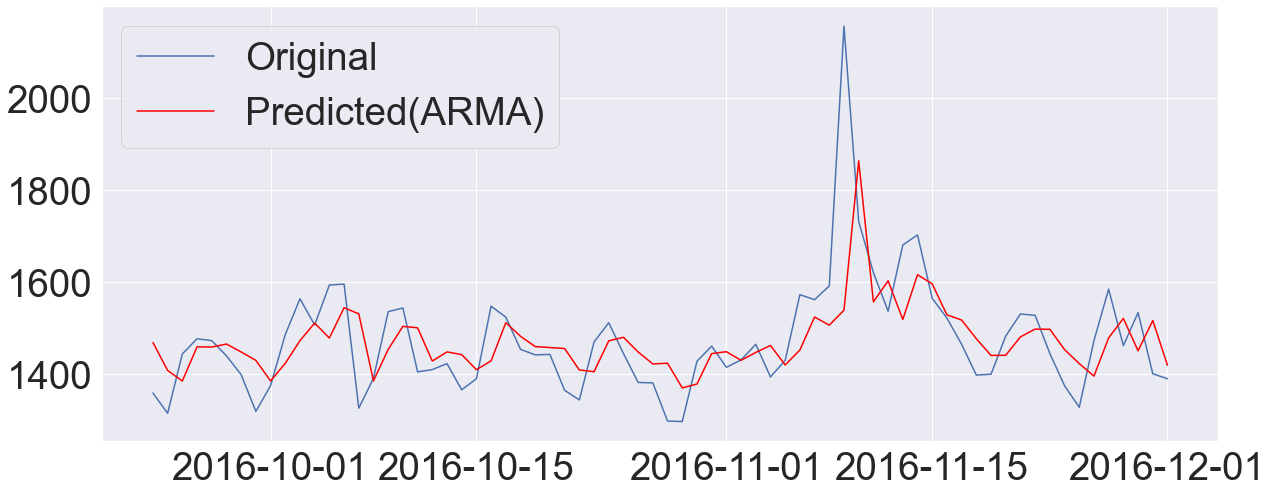

In [64]:
plt.figure(figsize=(20,8))
plt.plot(train['Visits'],label='Original')
plt.plot(arma_results.fittedvalues,color='red',label='Predicted(ARMA)')
plt.legend(loc='best')
plt.show();

# Summary:
- By visualizing the predicted and actual series we came to a conclusion that our ARMA Model predicited nearly following the same pattern as original pattern.

# calculating AIC,BIC for SARIMA Model

In [65]:
order_aic_bic=[]
for p in range(5):
    for q in range(5):
        try:
            model = SARIMAX(train,order = (p,0,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
            print(p,q,results.aic,results.bic)
            
        except:
            print(p,q,None,None)

0 0 1222.3700891970905 1224.6185844391398
0 1 1137.9185534905037 1142.4155439746023
0 2 1117.3014821019874 1124.0469678281354
0 3 1048.2096458693857 1057.2036268375832
0 4 1043.957996176929 1055.200472387176
1 0 875.7539173915603 880.2509078756591
1 1 872.1307750406568 878.8762607668049
1 2 867.0477292981544 876.0417102663519
1 3 868.6733209250107 879.9157971352574
1 4 870.5500558126103 884.0410272649065
2 0 875.5800231467217 882.3255088728698
2 1 879.7219824697443 888.7159634379417
2 2 867.9885155627054 879.2309917729522
2 3 870.8884215767141 884.3793930290103
2 4 872.6733144447919 888.4127811391375
3 0 871.5833035876202 880.5772845558176
3 1 868.1110232793935 879.3534994896403
3 2 870.2737974683845 883.7647689206807
3 3 873.1844495406716 888.9239162350171
3 4 869.9781534030813 887.9661153394761
4 0 871.879961438573 883.1224376488198
4 1 868.9104116351067 882.4013830874029
4 2 874.0021454240875 889.7416121184331
4 3 874.6575216052009 892.6454835415958
4 4 870.7736849391687 891.0101421

# sorting AIC,BIC in increasing order

In [66]:
# Construct DataFrame from order_aic_bic

order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print('----------------------sorting by AIC--------------')
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print('----------------------sorting by BIC--------------')

print(order_df.sort_values('BIC'))

----------------------sorting by AIC--------------
    p  q          AIC          BIC
7   1  2   867.047729   876.041710
12  2  2   867.988516   879.230992
16  3  1   868.111023   879.353499
8   1  3   868.673321   879.915797
21  4  1   868.910412   882.401383
19  3  4   869.978153   887.966115
17  3  2   870.273797   883.764769
9   1  4   870.550056   884.041027
24  4  4   870.773685   891.010142
13  2  3   870.888422   884.379393
15  3  0   871.583304   880.577285
20  4  0   871.879961   883.122438
6   1  1   872.130775   878.876261
14  2  4   872.673314   888.412781
18  3  3   873.184450   888.923916
22  4  2   874.002145   889.741612
23  4  3   874.657522   892.645484
10  2  0   875.580023   882.325509
5   1  0   875.753917   880.250908
11  2  1   879.721982   888.715963
4   0  4  1043.957996  1055.200472
3   0  3  1048.209646  1057.203627
2   0  2  1117.301482  1124.046968
1   0  1  1137.918553  1142.415544
0   0  0  1222.370089  1224.618584
----------------------sorting by BIC---

# Conclusion:
- For p=1,q=2 we got less AIC and BIC values

# Predicting SARIMA and calculating Mean Absolute Error (MAE)

In [67]:
# Fit model
model = SARIMAX(train, order=(1,0,2))
results_1 = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

85.21909838507872


In [68]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Visits   No. Observations:                   70
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -429.524
Date:                Tue, 01 Jun 2021   AIC                            867.048
Time:                        23:22:06   BIC                            876.042
Sample:                    09-23-2016   HQIC                           870.620
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001    915.984      0.000       0.998       1.002
ma.L1         -0.3628      0.103     -3.513      0.000      -0.565      -0.160
ma.L2         -0.3415      0.163     -2.091      0.037      -0.662      -0.021
sigma2      1.146e+04    880.837     13.009      0.000    9732.074    1.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               572.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             2.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
results_1.fittedvalues

date
2016-09-23       0.000000
2016-09-24    1354.454432
2016-09-25    1319.598362
2016-09-26    1422.534775
2016-09-27    1424.512214
2016-09-28    1439.357991
2016-09-29    1423.456473
2016-09-30    1406.735908
2016-10-01    1357.706122
2016-10-02    1397.892374
2016-10-03    1447.898857
2016-10-04    1491.586499
2016-10-05    1461.317839
2016-10-06    1540.130115
2016-10-07    1529.912104
2016-10-08    1380.309861
2016-10-09    1456.172209
2016-10-10    1502.820482
2016-10-11    1501.229529
2016-10-12    1425.295285
2016-10-13    1447.851605
2016-10-14    1436.681944
2016-10-15    1399.583337
2016-10-16    1417.061447
2016-10-17    1503.186220
2016-10-18    1471.162003
2016-10-19    1452.556977
2016-10-20    1451.130254
2016-10-21    1448.994217
2016-10-22    1397.704799
2016-10-23    1391.624210
2016-10-24    1459.336797
2016-10-25    1465.556783
2016-10-26    1433.914763
2016-10-27    1407.305929
2016-10-28    1407.722482
2016-10-29    1346.258285
2016-10-30    1351.804980
2016-10

# plotting SARIMA

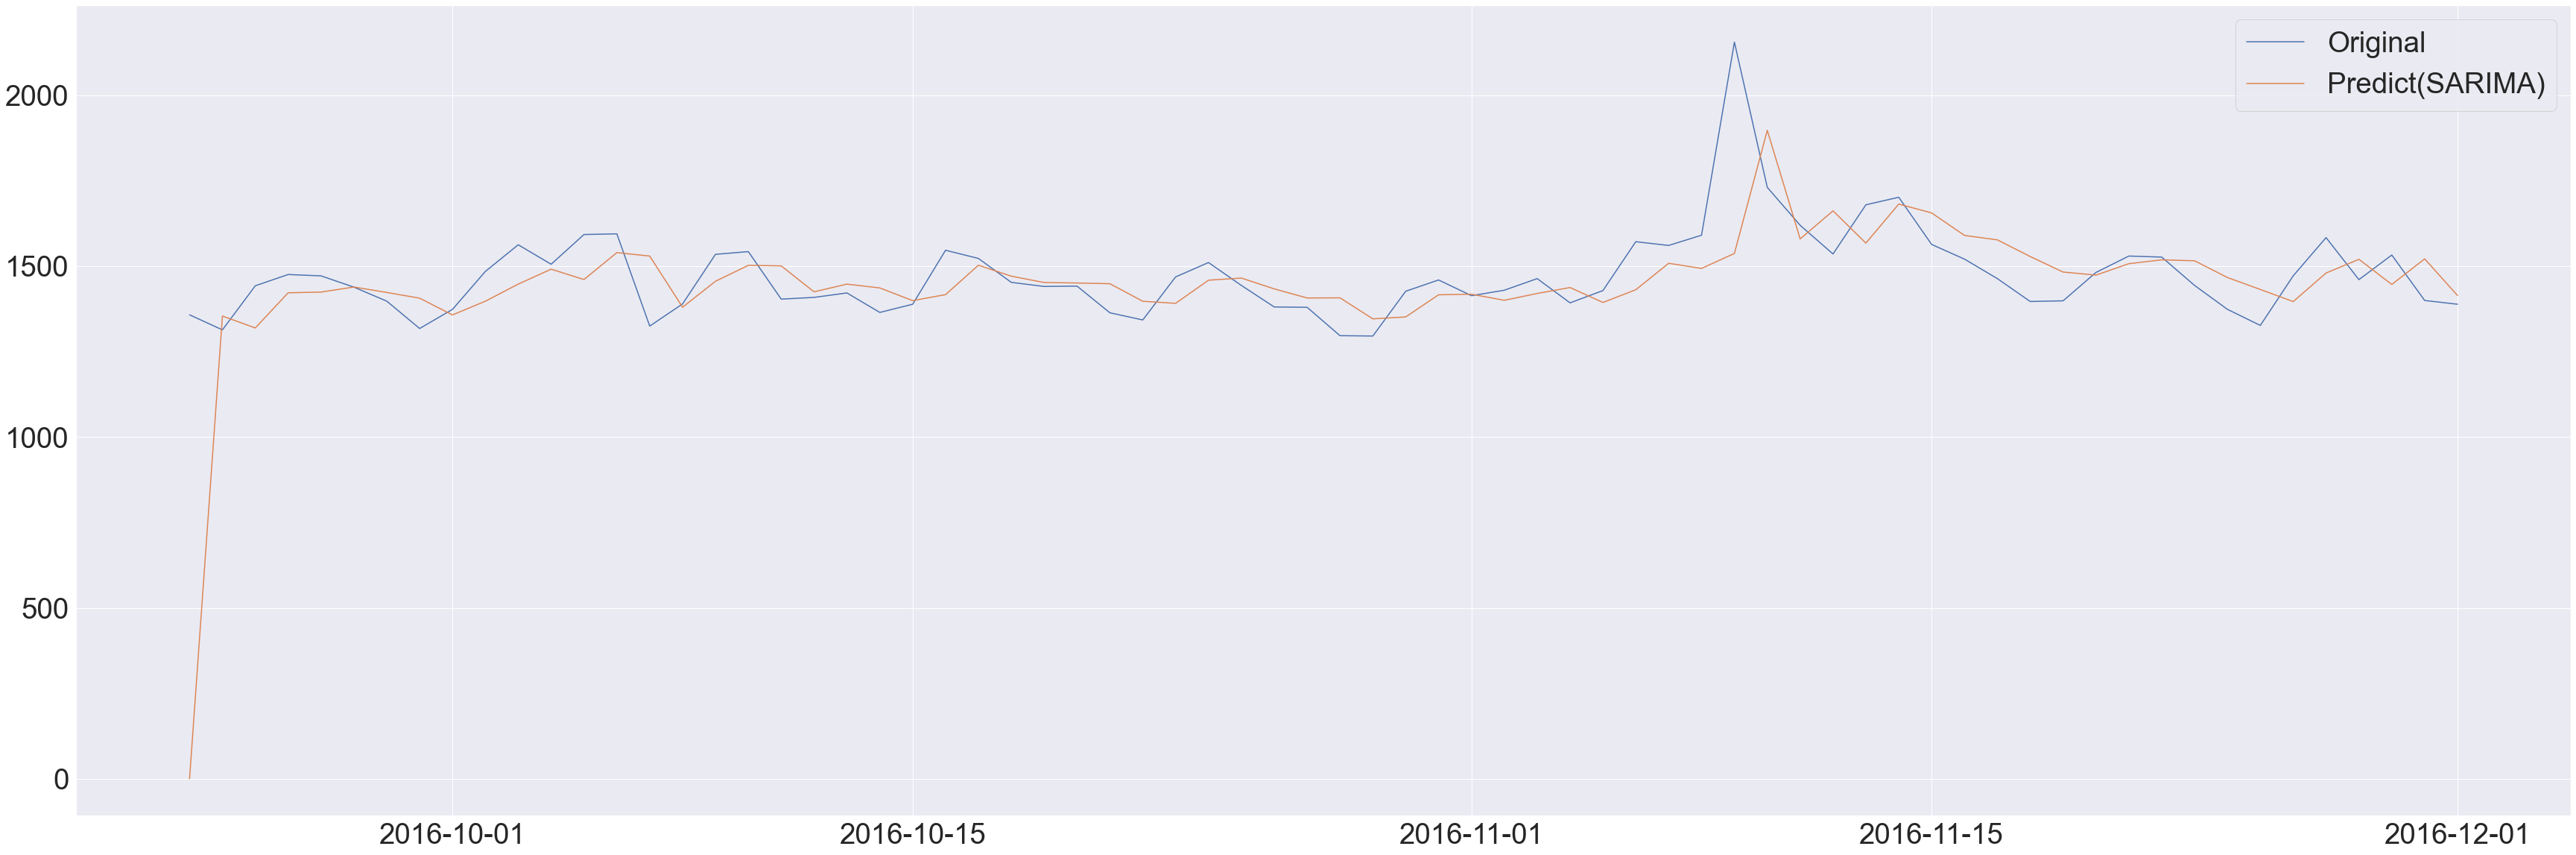

In [70]:
plt.figure(figsize=(60,20))
plt.plot(train['Visits'], label='Original')
plt.plot(results_1.fittedvalues, label='Predict(SARIMA)')
plt.legend(loc='best')
plt.show();

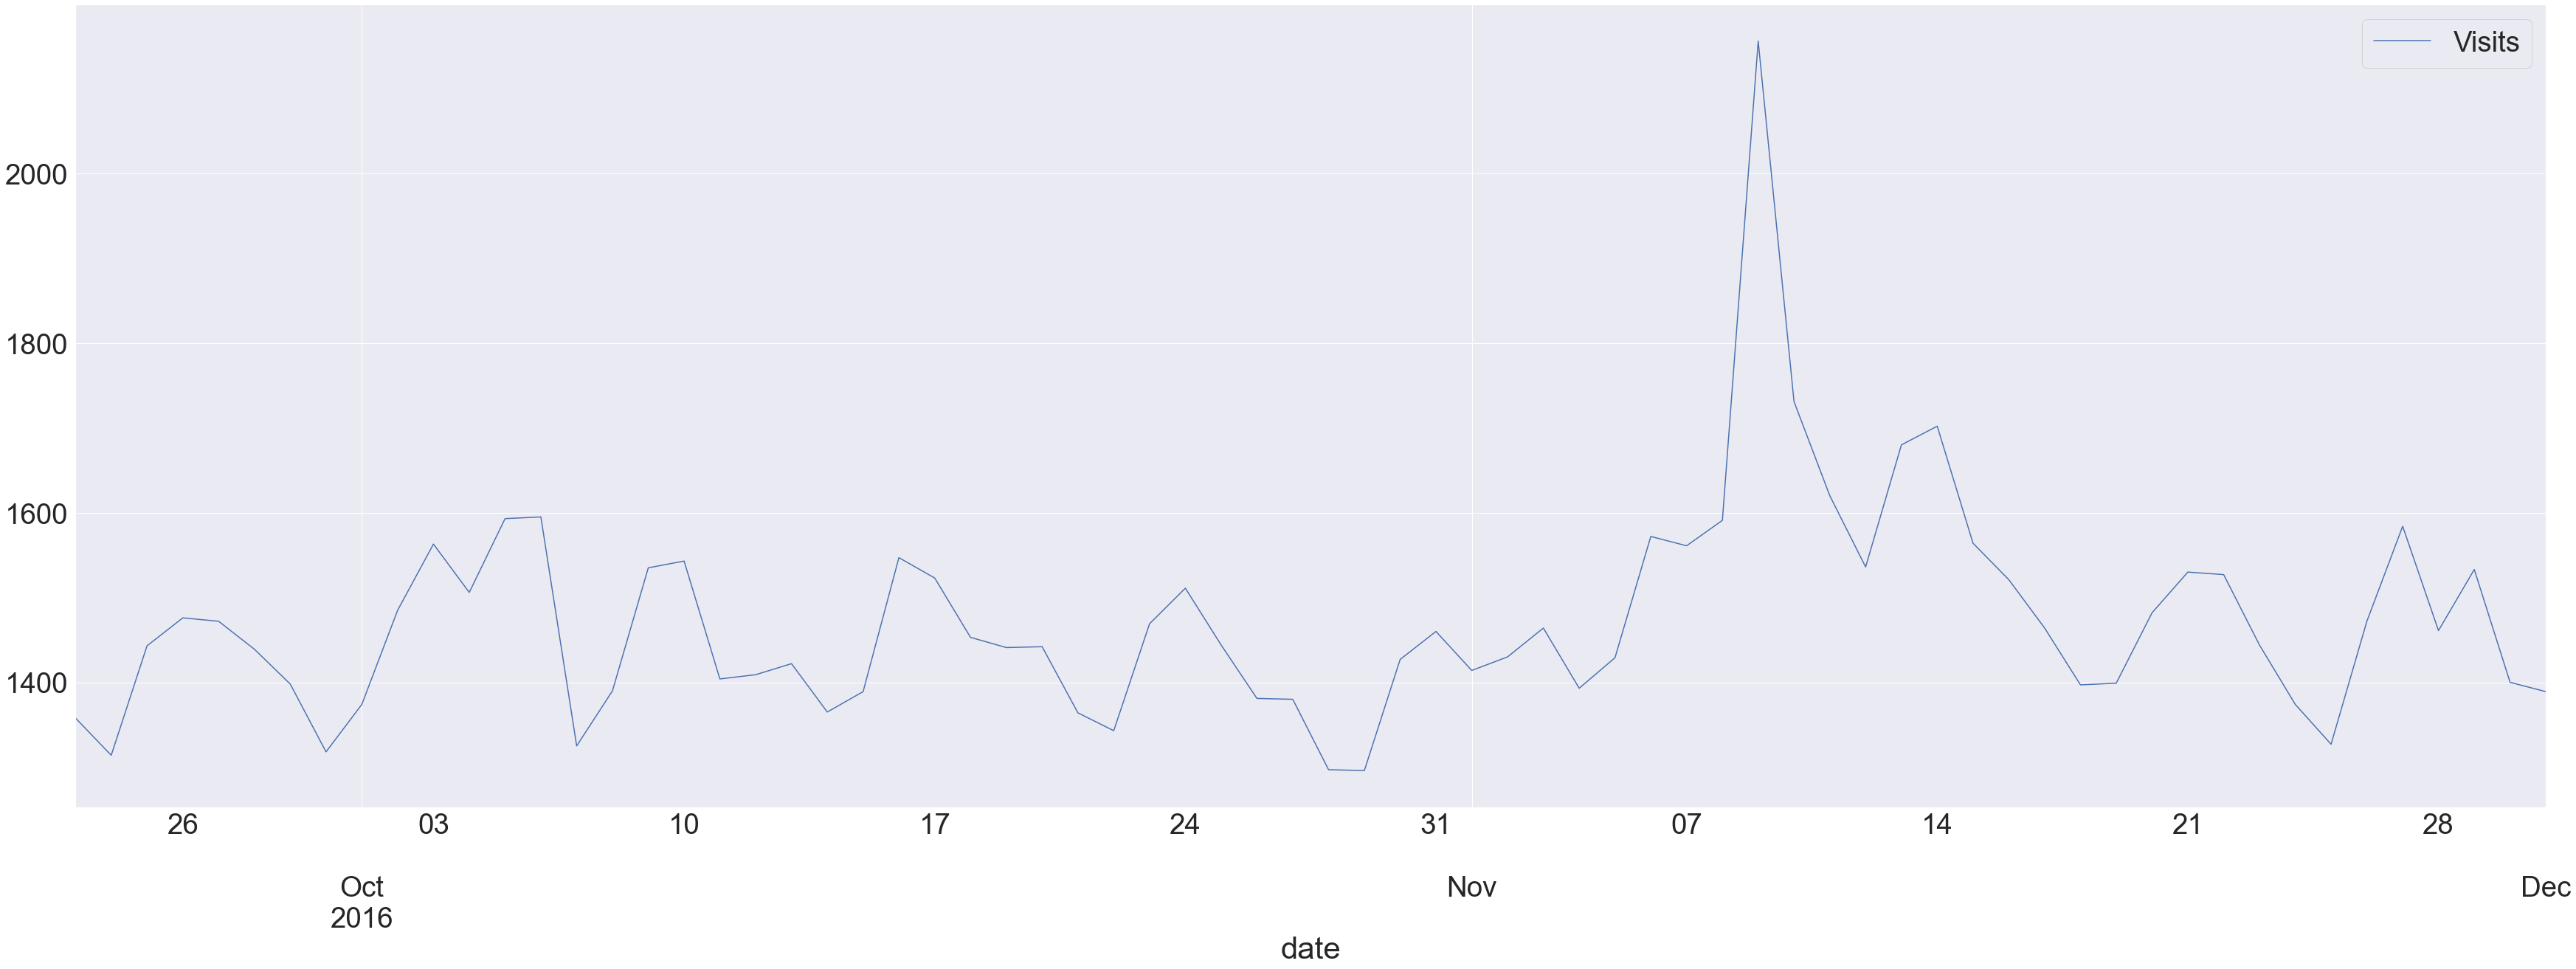

In [71]:
train.plot(figsize=(60,20),grid=True);

In [72]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


# importing PMDARIMA (Auto-ARIMA)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=878.832, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=854.242, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=857.664, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1222.370, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=855.350, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=856.163, Time=0.53 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=853.242, Time=0.13 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=854.857, Time=0.30 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=856.852, Time=0.27 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=877.362, Time=0.09 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=855.228, Time=0.16 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=855.154, Time=0.15 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=857.192, Tim

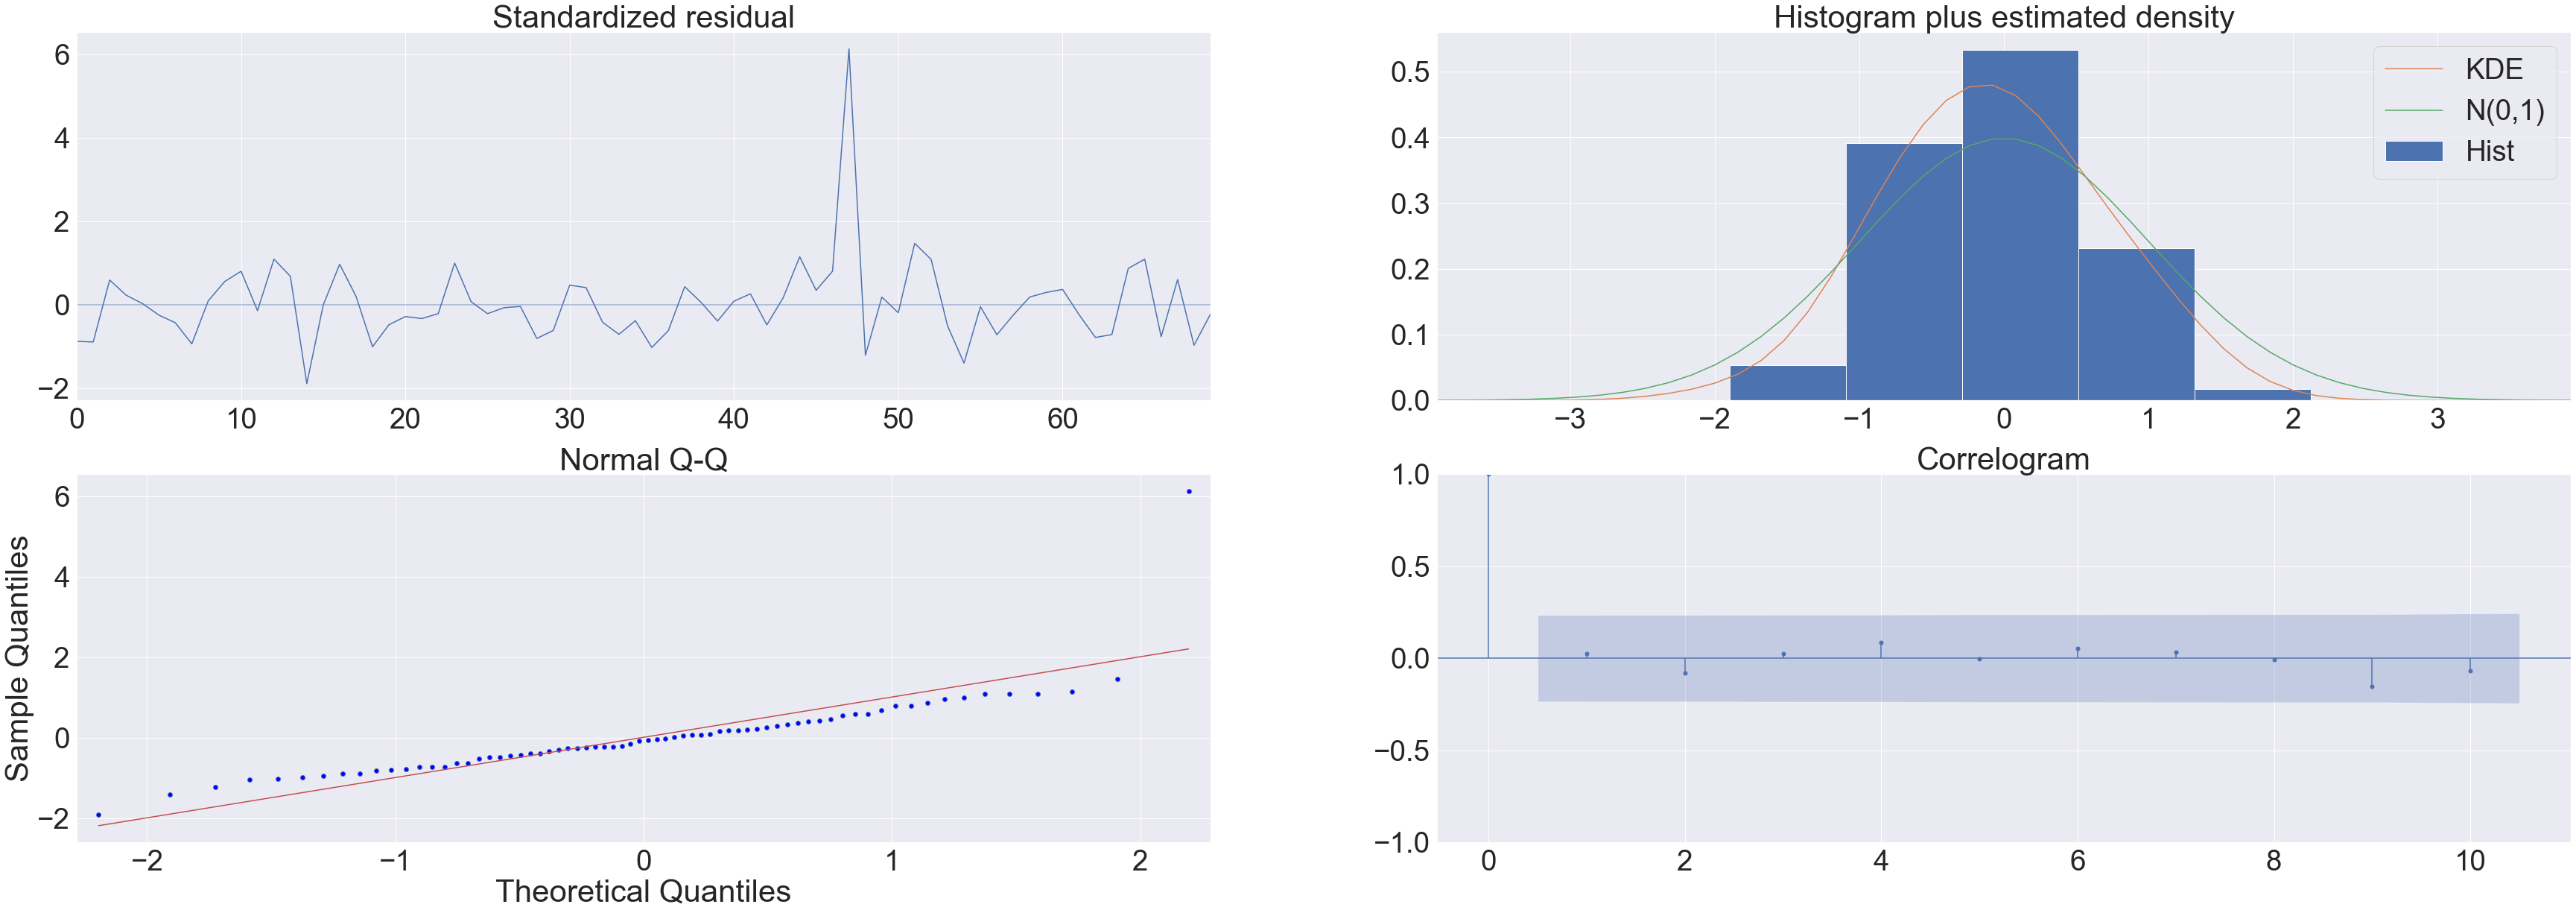

In [73]:
import pmdarima as pm
model=pm.auto_arima(y=train['Visits'],m=7,trace=True,seasonal=True,start_q=1,start_p=1,max_order=5,stepwise=True)
model.plot_diagnostics(figsize=(60,20));

# predicting Auto - ARIMA and calculating Mean Absolute Error (MAE)

In [74]:
# Fit model
model = ARIMA(train, order=(1,0,0))
armaauto_results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(armaauto_results.resid))

# Print mean absolute error
print(mae)

68.26268526315305


# plotting auto arima

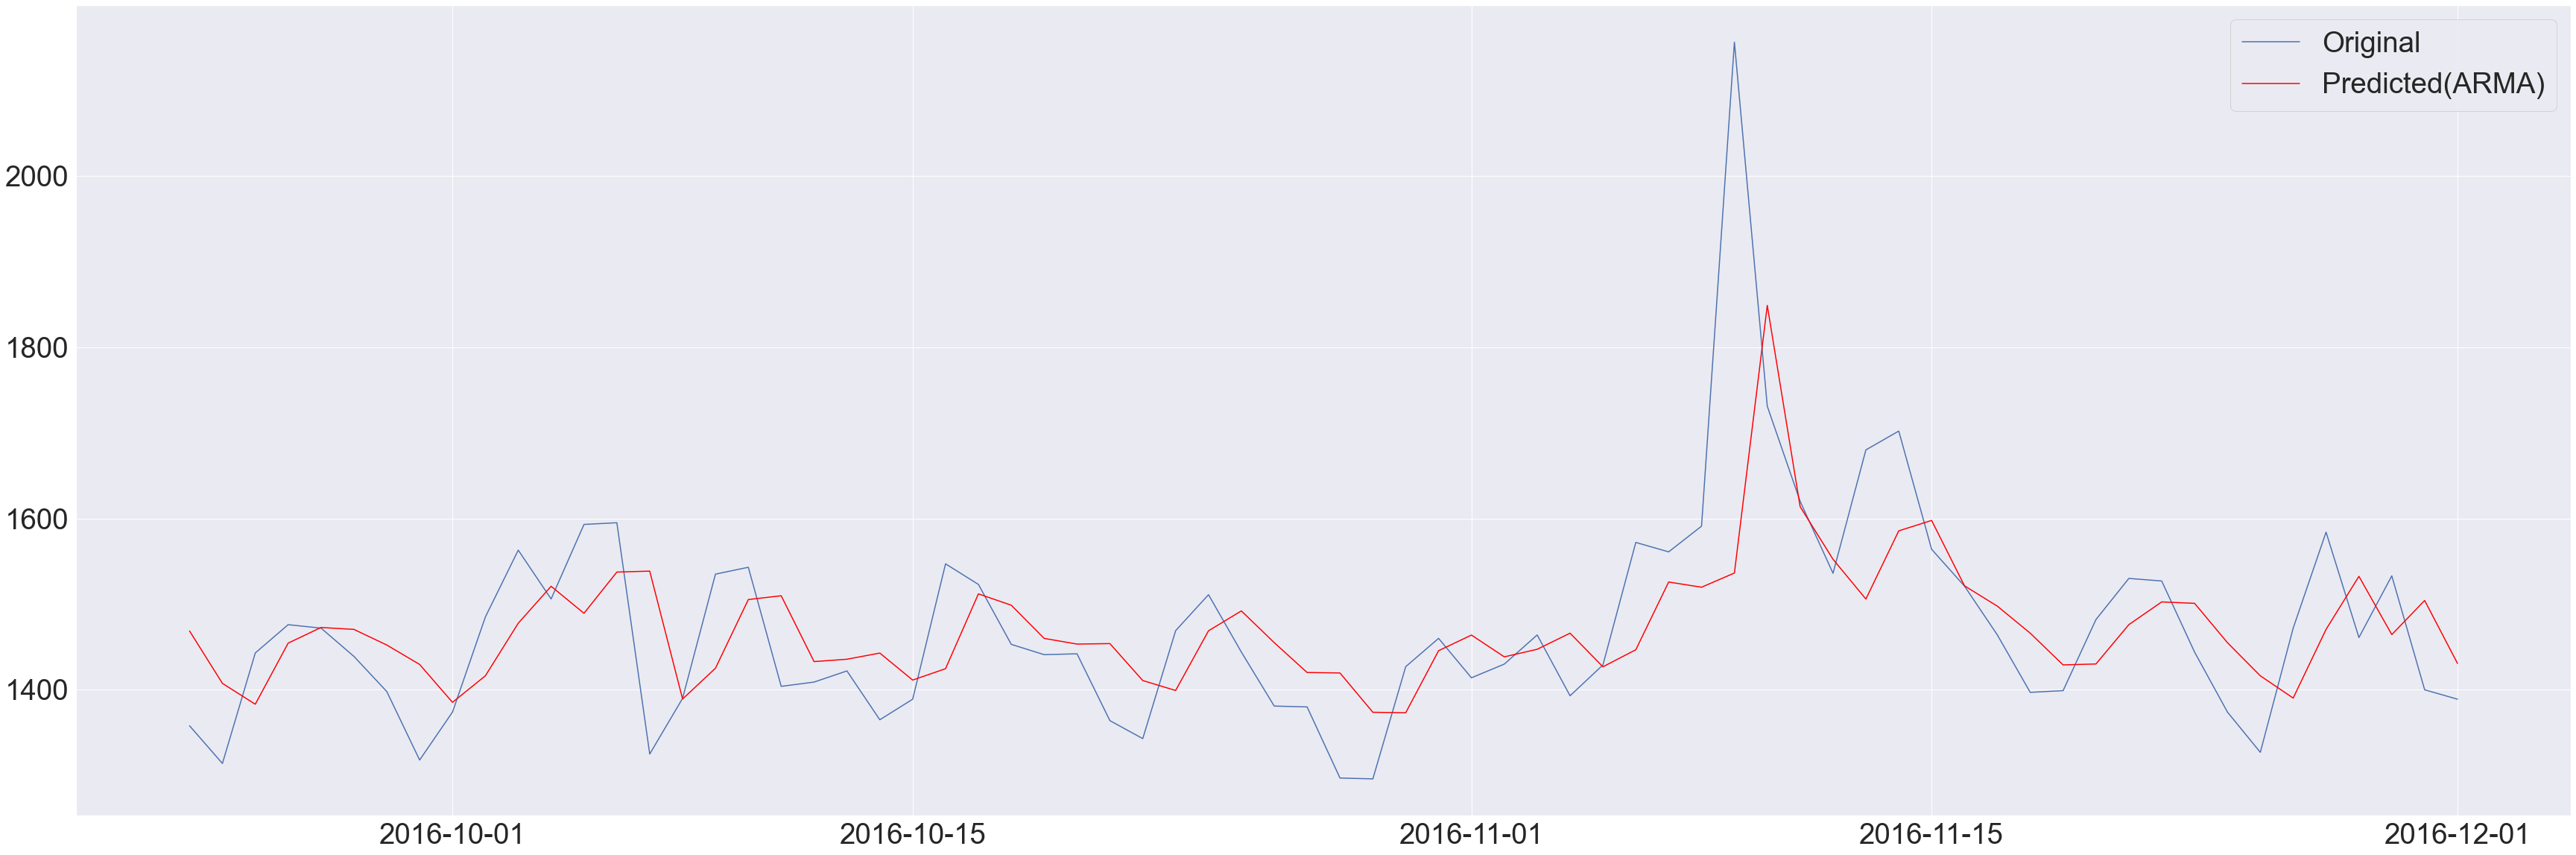

In [75]:
plt.figure(figsize=(60,20))
plt.plot(train['Visits'],label='Original')
plt.plot(armaauto_results.fittedvalues,color='red',label='Predicted(ARMA)')
plt.legend(loc='best')
plt.show();

In [76]:
#pip install fbprophet

In [77]:
#conda install libpython m2w64-toolchain -c msys2


In [78]:
#pip install pystan

In [79]:
#conda install pystan

In [80]:
#pip install fbprophet

In [81]:
#pip install pystan==2.19.1.1 prophet

# importing prophet

Prophet is an additive regression model with a piecewise linear or logistic growth curve trend.It is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


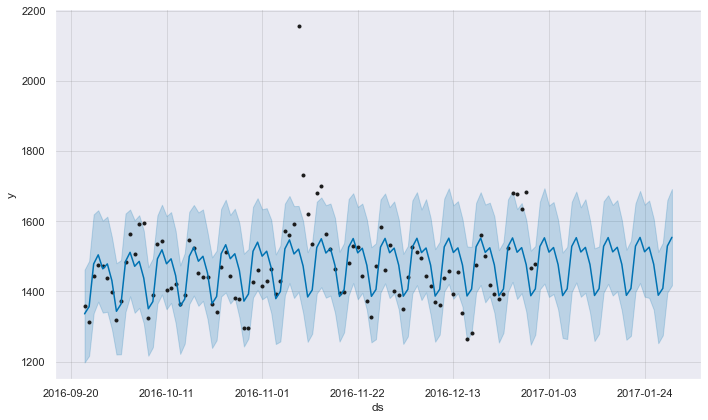

In [82]:
from fbprophet import Prophet
sns.set(font_scale=1) 
df_date_index = times_series_means[['Visits']]
df_prophet = df_date_index.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

# conclusion

This is not an end-to-end project.What i have done is for purely knowledge purpose to get hands-on Time series forecasting and satistical models. Based on the models i have used ARIMA(p,d,q) i.e for the order ARIMA(1,0,2) got the less Mean Absolute Error (MAE) of 67.55% comparte to other models.